In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('gs://ggf-eth-data/unprocessed_ethereum_2018_2020')
df.head(3)

In [89]:
df.shape

(2178388, 5)

In [90]:
# filter the dataset
while (len(excl_out) > 0 and len(excl_in) > 0):
    # filter based on out degree
    out_degree = df.groupby('from_address').from_address.count().to_frame('count').reset_index()
    excl_out = out_degree.loc[out_degree['count'] <= 3]['from_address']
    df = df[~df['from_address'].isin(excl_out)]
    
    # filter based on in degree
    in_degree = df.groupby('to_address').to_address.count().to_frame('count').reset_index()
    excl_in = in_degree.loc[in_degree['count'] <= 3]['to_address']
    df = df[~df['to_address'].isin(excl_in)]

In [96]:
df.shape

(135405, 5)

In [97]:
out_degree['count_log'] = np.log(out_degree['count']+1)
in_degree['count_log'] = np.log(in_degree['count']+1)

In [99]:
out_degree['count_log'].describe()

count    11204.000000
mean         2.029671
std          0.648295
min          1.609438
25%          1.609438
50%          1.791759
75%          2.197225
max          8.078068
Name: count_log, dtype: float64

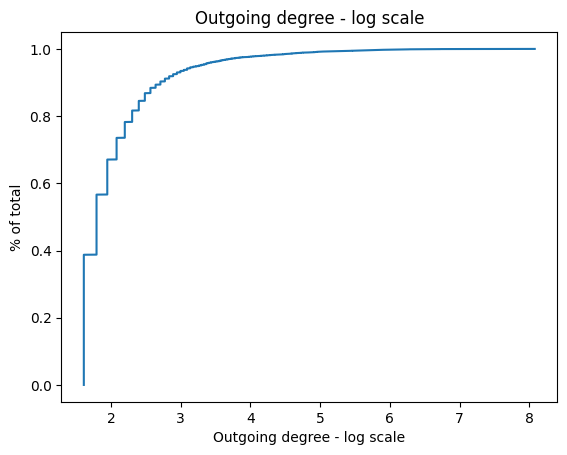

In [101]:
n = len(out_degree['count_log'])
x = np.sort(out_degree['count_log'])
y = np.arange(n) / float(n)

plt.xlabel('Outgoing degree - log scale')
plt.ylabel('% of total')
plt.title('Outgoing degree - log scale')
plt.plot(x, y)

In [102]:
in_degree['count_log'].describe()

count    14360.000000
mean         1.954377
std          0.563231
min          1.609438
25%          1.609438
50%          1.791759
75%          2.079442
max          7.852439
Name: count_log, dtype: float64

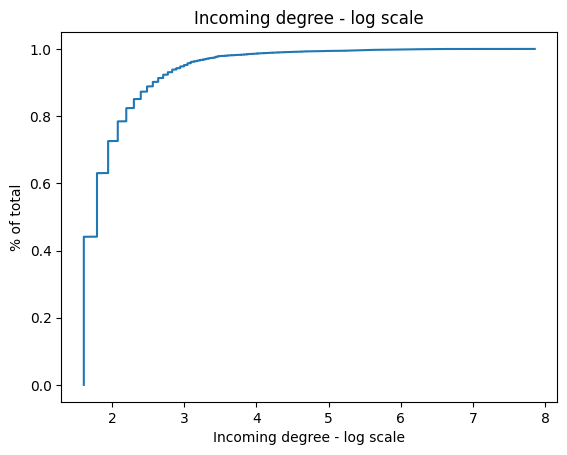

In [104]:
n = len(in_degree['count_log'])
x = np.sort(in_degree['count_log'])
y = np.arange(n) / float(n)

plt.xlabel('Incoming degree - log scale')
plt.ylabel('% of total')
plt.title('Incoming degree - log scale')
plt.plot(x, y)

In [105]:
raw_data = df.to_dict('records')

transaction_dict = {}
for row in raw_data:
    id_ = row['from_address']
    if id_ not in transaction_dict:
        transaction_dict[id_] = []
    
    value = row['value']
    transaction_dict[id_].append(value)

In [107]:
#transaction_dict

In [108]:
 {k:v for k, v in transaction_dict.items() if k == '0x65b435425e7928c594997f38681b542234be91d3'}

{'0x65b435425e7928c594997f38681b542234be91d3': [337.1064761351995,
  364.4,
  159.74804709763396,
  147.34288234647502,
  0.1900000000000001,
  21.245945014831527,
  16.274611750000002,
  1193.4504603732398,
  98.5,
  192.3,
  75.93,
  61.07]}